<a href="https://colab.research.google.com/github/fotojuanmoreno/DescubriendoML/blob/master/4.-%20arbol_decisiones_1/arbol_decisiones_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para este proyecto vamos a cargar una serie de librerías y elementos.
Lo primero que haremos será importar DecisionTreeClassifier para generar nuestro arbol de decisiones. Igualmente importaremos dos bases de datos desde datasets y train_test_split para separar nuestros datos entre entrenamiento y prueba.

El resto de elementos son herramientas que nos ayudarán a generan una versión visual de nuestro arbol de decisiones.

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt
import numpy as np

Pasamos los datos a nuestra variable. En este caso vamos a usar la base iris, que contiene una gran cantidad de información sbre distintas flores y se organizan segun su tipo. Lo que vamos a hacer es crear el árbol de decisiones de como se diferencian y clasifican unas y otras.

In [2]:
iris = load_iris()

dividimos los datos para entrenar y probar el algoritmo (esto ya se vio en pruebas anteriores)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target)

asignamos a nuestra variable tree la función para generar nuestro arbol de decisiones.

In [5]:
tree = DecisionTreeClassifier()

y entrenar nuestro modelo:

In [6]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

y con score podemos ver que tal ha aprendido nuestro algoritmo:

In [7]:
tree.score(X_test, Y_test)

0.9210526315789473

Vamos a repetir este proceso, pero esta vez con los datos que utilizamos para entrenarlo. Esto nos da un acierto del 100%. Esto el Machine Learning se llama sobre ajuste y, por norma general, no implica algo bueno.

In [8]:
tree.score(X_train, Y_train)

1.0

Ahora vamos a generar un archivo .dot, este archivo guarda la información de nuestro arvol de decisiones y lo utilizaremos para generar una versión visual del mismo:


In [10]:
export_graphviz(tree, out_file = "tree.dot", class_names = iris.target_names, feature_names = iris.feature_names, impurity = False, filled = True)

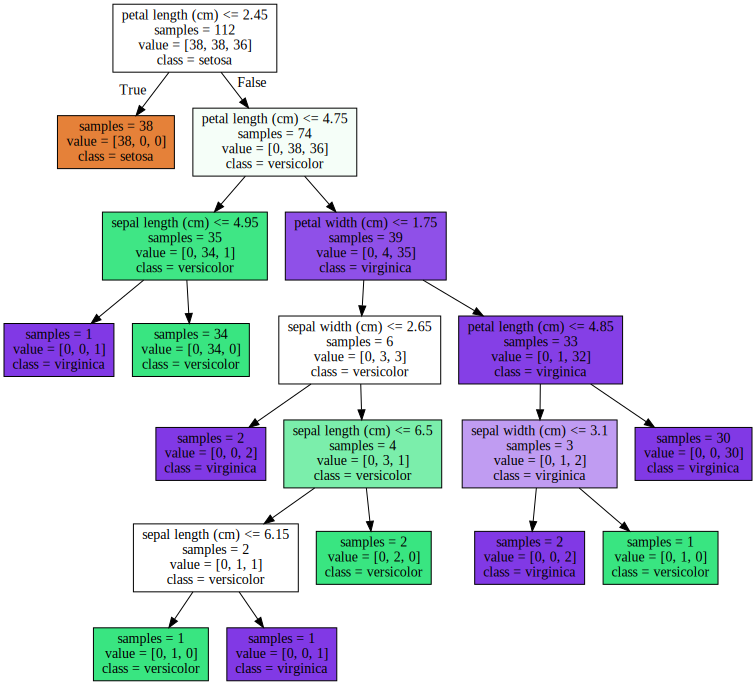

In [12]:
with open ("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Ahora, utilizando matplotib, podemos generar una gráfica que nos muestre la importancia de los dstintos datos que contiene nuestra base a la hora de clasificarlos.

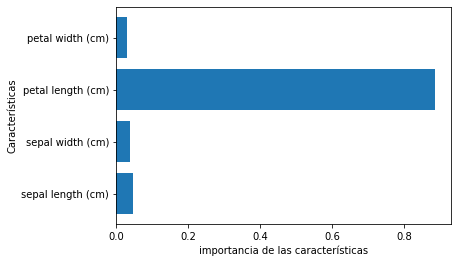

In [13]:
caract = iris.data.shape[1]
plt.barh(range(caract), tree.feature_importances_)
plt.yticks(np.arange(caract), iris.feature_names)
plt.xlabel("importancia de las características")
plt.ylabel("Características")
plt.show()

Llama la atención que la pricipal caracteristica que utiliza para dividir y asignar su categoria a las distintas plantas el la longitud de sus pétalos.

Vamos a probar alguna opción del arbol de decisioes con DecisionTreeClassifier. Nuestro arbol actual tiene una profundidad de 6 niveles. Estas son las veces que dubdivide la información según sus datos. Limitemoslo a 3. Para esto, depues de ajustar la profundidad, repetiremos el proceso y el entrenamiento. Como antes probaremos con los datos test y con los de entrenaiento:

In [14]:
tree = DecisionTreeClassifier(max_depth = 3)

In [15]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
tree.score(X_test, Y_test)

0.9473684210526315

In [18]:
tree.score(X_train, Y_train)

0.9642857142857143

Si subimos un poco en el código podemos ver que, con los datos de test hemos pasado de un 92% a un 94,7% y los datos de entremaniento han bajado de un 100% a un 96,4%. Esto se debe al sobre ajuste del que hablabamos antes. El algoritmo estaba creando excepciones para ajustarse mejor a los datos, pero esto probacaba un problema que le hacia fallar más que si no profundiza tanto.


Vamos a utilizar matplotlib para visualizar esto (el siguiente código no lo he visto, simplemente esta ahí para ayudar, a visualizar esto y espero verlo más adelante):

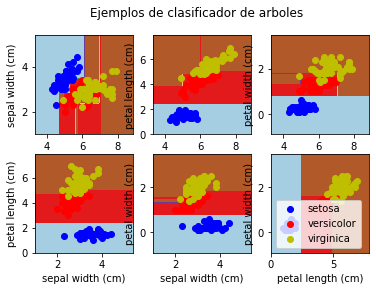

In [24]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                            [1, 2], [1, 3], [2, 3]]):
  X = iris.data[:, pair]
  y = iris.target

  #train algorithm
  clf = DecisionTreeClassifier().fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  plt.axis("tight")

  #plot the training points
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                cmap = plt.cm.Paired)
  plt.axis("tight")
plt.suptitle("Ejemplos de clasificador de arboles")
plt.legend()
plt.show()

esos graficos muestras como el algoritmo divide los elementos para seleccionarlos. en varios de ellos se pueden ver lineas finas que sobresalen. Eso es el sobreajuste. El algoritmo crea una sección más pequeña para ajustarse a elementos concretos, con lo que el funcionamiento general se de perjudicado. 

Repitamos ahora el proceso, pero indiquemos el mismo ajuste que hicimos en nuesro código:

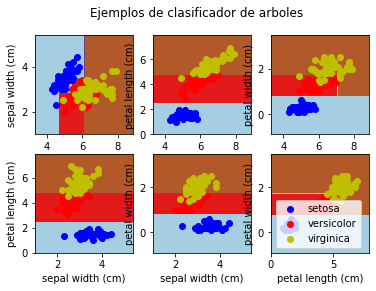

In [25]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                            [1, 2], [1, 3], [2, 3]]):
  X = iris.data[:, pair]
  y = iris.target

  #train algorithm
  clf = DecisionTreeClassifier(max_depth = 3).fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  plt.axis("tight")

  #plot the training points
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                cmap = plt.cm.Paired)
  plt.axis("tight")
plt.suptitle("Ejemplos de clasificador de arboles")
plt.legend()
plt.show()

Ahora la gráfica se ve más limpia y el sobre ajuste es menor.